In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd

In [59]:
df_ipc=pd.read_csv("Data/ethiopia_admin1_fewsnet_population.csv",index_col=0)

In [60]:
# df_ipc=pd.read_csv("Data/ethiopia_admin1_fewsnet_population.csv",index_col=0)

In [61]:
df_ipc.head()

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,ML1_2,ML1_3,ML1_4,ML1_5,ML2_1,ML2_2,ML2_3,ML2_4,ML2_5,total_pop
0,2009-07-01,Addis Ababa,3585647,2726821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2009-07-01,Afar,1904414,1448271,0,702984,745287,0,0,0,702984,745287,0,0,0,862230,586041,0,0,1448271
2,2009-07-01,Amhara,21790172,16571038,9531637,1743855,5295546,0,0,9531637,1743855,5295546,0,0,7609926,8961112,0,0,0,16571038
3,2009-07-01,Benishangul Gumz,1102849,838696,838696,0,0,0,0,838696,0,0,0,0,838696,0,0,0,0,838696
4,2009-07-01,Dire Dawa,508918,387022,0,387022,0,0,0,0,387022,0,0,0,0,387022,0,0,0,387022


In [62]:
df_ipc.columns

Index(['date', 'ADM1_EN', 'Total', 'adjusted_population', 'CS_1', 'CS_2',
       'CS_3', 'CS_4', 'CS_5', 'ML1_1', 'ML1_2', 'ML1_3', 'ML1_4', 'ML1_5',
       'ML2_1', 'ML2_2', 'ML2_3', 'ML2_4', 'ML2_5', 'total_pop'],
      dtype='object')

In [63]:
def get_trigger(row,status,level,perc):
    #range till 6 cause 5 is max level
    cols=[f"{status}_{l}" for l in range(level,6)]
    if row["total_pop"]==0:
        return 0
    if row[cols].sum() >= row["total_pop"]/(100/perc):
        return 1
    else:
        return 0

In [64]:
def get_trigger_increase(row,level,perc):
    #range till 6 cause 5 is max level
    cols_ml1=[f"ML1_{l}" for l in range(level,6)]
    cols_cs=[f"CS_{l}" for l in range(level,6)]
    if row["total_pop"]==0 or row[cols_ml1].sum() == 0:
        return 0
    if row[cols_ml1].sum() >= row[cols_cs].sum()*(1+(perc/100)):
        return 1
    else:
        return 0

In [65]:
df_ipc['date'] = pd.to_datetime(df_ipc['date'])
df_ipc['year'] = df_ipc['date'].dt.year
df_ipc['month'] = df_ipc['date'].dt.month

In [66]:
df_ipc["trigger_CS_3_20"]=df_ipc.apply(lambda x: get_trigger(x,"CS",3,20),axis=1)
df_ipc["trigger_CS_4_2"]=df_ipc.apply(lambda x: get_trigger(x,"CS",4,2.5),axis=1)
df_ipc["trigger_CS_4_20"]=df_ipc.apply(lambda x: get_trigger(x,"CS",4,20),axis=1)
df_ipc["trigger_ML1_3_5"]=df_ipc.apply(lambda x: get_trigger(x,"ML1",3,5),axis=1)
df_ipc["trigger_ML1_4_2"]=df_ipc.apply(lambda x: get_trigger(x,"ML1",4,2.5),axis=1)
df_ipc["trigger_ML1_3_30"]=df_ipc.apply(lambda x: get_trigger(x,"ML1",3,30),axis=1)
df_ipc["trigger_ML1_3_5i"]=df_ipc.apply(lambda x: get_trigger_increase(x,3,5),axis=1)

In [67]:
df_ipc.head()

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,total_pop,year,month,trigger_CS_3_20,trigger_CS_4_2,trigger_CS_4_20,trigger_ML1_3_5,trigger_ML1_4_2,trigger_ML1_3_30,trigger_ML1_3_5i
0,2009-07-01,Addis Ababa,3585647,2726821,0,0,0,0,0,0,...,0,2009,7,0,0,0,0,0,0,0
1,2009-07-01,Afar,1904414,1448271,0,702984,745287,0,0,0,...,1448271,2009,7,1,0,0,1,0,1,0
2,2009-07-01,Amhara,21790172,16571038,9531637,1743855,5295546,0,0,9531637,...,16571038,2009,7,1,0,0,1,0,1,0
3,2009-07-01,Benishangul Gumz,1102849,838696,838696,0,0,0,0,838696,...,838696,2009,7,0,0,0,0,0,0,0
4,2009-07-01,Dire Dawa,508918,387022,0,387022,0,0,0,0,...,387022,2009,7,0,0,0,0,0,0,0


In [70]:
adm1c='ADM1_EN' #"ADMIN1" #

In [73]:
#Analysis 1: 20% IPC3+ (current situation) + 2.5% IPC4+ (current situation)
df_snCS20ML12 = df_ipc.loc[(df_ipc['trigger_CS_3_20']==1)&(df_ipc['trigger_ML1_4_2']==1)]
df_snCS20ML12.groupby(['year', 'month'], as_index=False)[adm1c].agg(lambda x: list(x))

,year,month,ADM1_EN
0,2009,7,[Somali]
1,2010,1,"[Afar, Gambela, Somali]"
2,2011,4,[Somali]
3,2011,7,"[Oromia, Somali]"
4,2015,10,[Afar]
5,2016,2,"[Afar, Oromia]"
6,2017,6,[Somali]
7,2017,10,[Somali]


In [74]:
# #Analysis 1b: 20% IPC3+ (current situation) + (2.5% IPC4+ (current situation) OR 5% increase in IPC3+ (ML1))
# df_snCS20ML12oML1i = df_ipc.loc[(df_ipc['trigger_CS_3_20']==1)&((df_ipc['trigger_ML1_4_2']==1)| (df_ipc['trigger_ML1_3_5i'] == 1))]
# df_snCS20ML12oML1i.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x))

In [75]:
# #Analysis 1c: 20% IPC3+ (current situation) + 5% increase in IPC3+ (ML1)
# df_snCS20ML1i = df_ipc.loc[(df_ipc['trigger_CS_3_20']==1)&(df_ipc['trigger_ML1_3_5i'] == 1)]
# df_snCS20ML1i.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x))

In [76]:
#Analysis 2: 20% IPC3+ (current situation) + 2.5% IPC4+ (current situation) + 5% increase in IPC3+ (ML1)
df_snCS20ML12ML1i = df_ipc.loc[(df_ipc['trigger_CS_3_20']==1)&(df_ipc['trigger_ML1_4_2']==1) & (df_ipc['trigger_ML1_3_5i'] == 1)]
df_snCS20ML12ML1i.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x))

,year,month,ADM1_EN
0,2010,1,"[Afar, Somali]"
1,2016,2,[Oromia]
2,2017,10,[Somali]


In [77]:
#Analysis 3: IPC4+ at 20% (current situation)
df_snCS420 = df_ipc.loc[df_ipc['trigger_CS_4_20']==1]
df_snCS420.groupby(['year', 'month'], as_index=False)['ADM1_EN'].agg(lambda x: list(x))

,year,month,ADM1_EN
0,2009,7,[Somali]
1,2009,10,[Somali]
2,2011,4,[Somali]
3,2011,7,[Somali]
4,2011,10,[Somali]
5,2017,6,[Somali]
6,2017,10,[Somali]


In [81]:
b=df_snCS420[df_snCS420.date=="2009-07"]

In [85]:
b

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,total_pop,year,month,trigger_CS_3_20,trigger_CS_4_2,trigger_CS_4_20,trigger_ML1_3_5,trigger_ML1_4_2,trigger_ML1_3_30,trigger_ML1_3_5i
9,2009-07-01,Somali,6216411,4727467,0,0,2664781,2062686,0,0,...,4727467,2009,7,1,1,1,1,1,1,0


In [83]:
b[["CS_4","CS_5"]].sum(axis=1)

9    2062686
dtype: int64

In [89]:
df_ipc

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,total_pop,year,month,trigger_CS_3_20,trigger_CS_4_2,trigger_CS_4_20,trigger_ML1_3_5,trigger_ML1_4_2,trigger_ML1_3_30,trigger_ML1_3_5i
0,2009-07-01,Addis Ababa,3585647,2726821,0,0,0,0,0,0,...,0,2009,7,0,0,0,0,0,0,0
1,2009-07-01,Afar,1904414,1448271,0,702984,745287,0,0,0,...,1448271,2009,7,1,0,0,1,0,1,0
2,2009-07-01,Amhara,21790172,16571038,9531637,1743855,5295546,0,0,9531637,...,16571038,2009,7,1,0,0,1,0,1,0
3,2009-07-01,Benishangul Gumz,1102849,838696,838696,0,0,0,0,838696,...,838696,2009,7,0,0,0,0,0,0,0
4,2009-07-01,Dire Dawa,508918,387022,0,387022,0,0,0,0,...,387022,2009,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2019-10-01,Harari,260022,260022,0,260022,0,0,0,0,...,260022,2019,10,0,0,0,0,0,0,0
414,2019-10-01,Oromia,37843293,37843293,24161597,5485676,8196020,0,0,26396016,...,37843293,2019,10,1,0,0,1,0,0,0
415,2019-10-01,SNNP,20262695,20262695,10930317,8200544,1131834,0,0,16067419,...,20262695,2019,10,0,0,0,0,0,0,0
416,2019-10-01,Somali,6216411,6216411,0,1886921,4329490,0,0,0,...,6216411,2019,10,1,0,0,1,0,0,0


In [88]:
# df_ipc[df_ipc.dste==b.date]#["CS_4","CS_5"]

ValueError: Can only compare identically-labeled Series objects

In [84]:
def get_stats(row,df,trigcols=["CS_4","CS_5"]):
    pop_admtrig=row[trigcols].sum(axis=1)
    d=row.date
    pop_coutrig=df.loc[df.date==d,trigcols].sum()
    

In [ ]:
for d in df_snCS420.date.unique():
    

In [15]:
df_ipc["perc_CS4"]=df_ipc["CS_4"]/df_ipc["adjusted_population"]*100

In [16]:
df_ipc.perc_CS4.max()

62.29253424719834

In [17]:
df_ipc[df_ipc.date=="2019-10"]#["perc_CS4"]

,date,ADM1_EN,Total,adjusted_population,CS_1,CS_2,CS_3,CS_4,CS_5,ML1_1,...,year,month,trigger_CS_3_20,trigger_CS_4_2,trigger_CS_4_20,trigger_ML1_3_5,trigger_ML1_4_2,trigger_ML1_3_30,trigger_ML1_3_5i,perc_CS4
407,2019-10-01,Addis Ababa,3585647,3585647,3585647,0,0,0,0,3585647,...,2019,10,0,0,0,0,0,0,0,0.0
408,2019-10-01,Afar,1904414,1904414,0,1133795,770619,0,0,0,...,2019,10,1,0,0,1,0,1,0,0.0
409,2019-10-01,Amhara,21790172,21790172,12869611,8404104,516457,0,0,18746752,...,2019,10,0,0,0,0,0,0,0,0.0
410,2019-10-01,Benishangul Gumz,1102849,1102849,1102849,0,0,0,0,1102849,...,2019,10,0,0,0,0,0,0,0,0.0
411,2019-10-01,Dire Dawa,508918,508918,319985,188933,0,0,0,319985,...,2019,10,0,0,0,0,0,0,0,0.0
412,2019-10-01,Gambela,462832,462832,462832,0,0,0,0,462832,...,2019,10,0,0,0,0,0,0,0,0.0
413,2019-10-01,Harari,260022,260022,0,260022,0,0,0,0,...,2019,10,0,0,0,0,0,0,0,0.0
414,2019-10-01,Oromia,37843293,37843293,24161597,5485676,8196020,0,0,26396016,...,2019,10,1,0,0,1,0,0,0,0.0
415,2019-10-01,SNNP,20262695,20262695,10930317,8200544,1131834,0,0,16067419,...,2019,10,0,0,0,0,0,0,0,0.0
416,2019-10-01,Somali,6216411,6216411,0,1886921,4329490,0,0,0,...,2019,10,1,0,0,1,0,0,0,0.0


In [18]:
import seaborn as sns

In [19]:
df_ipc.columns

Index(['date', 'ADM1_EN', 'Total', 'adjusted_population', 'CS_1', 'CS_2',
       'CS_3', 'CS_4', 'CS_5', 'ML1_1', 'ML1_2', 'ML1_3', 'ML1_4', 'ML1_5',
       'ML2_1', 'ML2_2', 'ML2_3', 'ML2_4', 'ML2_5', 'total_pop', 'year',
       'month', 'trigger_CS_3_20', 'trigger_CS_4_2', 'trigger_CS_4_20',
       'trigger_ML1_3_5', 'trigger_ML1_4_2', 'trigger_ML1_3_30',
       'trigger_ML1_3_5i', 'perc_CS4'],
      dtype='object')

In [20]:
df_ipc["perc_CS4"].value_counts().sort_index()

0.000000     402
2.370135       1
3.917398       1
6.429119       1
8.905067       1
10.363119      1
10.363126      1
14.773934      1
14.773947      1
16.670121      1
25.397149      1
35.931005      1
40.672921      2
43.631949      1
43.631971      1
62.292534      1
Name: perc_CS4, dtype: int64

In [21]:
# sns.distplot(df_ipc["perc_CS4"])#,binwidth=1)#,x="perc_CS4")

In [22]:
# # set the range for the choropleth
# vmin, vmax = 0,1
# # create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(10, 6))

# shape_path="Data/ET_Admin2_OCHA_2019/eth_admbnda_adm2_csa_bofed_20190827.shp"
# gdf = gpd.read_file(shape_path)[["ADM1_EN","ADM2_EN","geometry"]]
# merged = gdf.set_index("ADM1_EN").join(df_ipc[df_ipc.date=="2017-10"].set_index("ADM1_EN"))
# merged.plot(column="perc_CS4", cmap="Blues", linewidth=0.8, ax=ax, edgecolor='0.8')

In [23]:
def plot_regions_trig(df_trig,adm0c="ADM0_EN",adm1c="ADM1_EN",shape_path="Data/ET_Admin2_OCHA_2019/eth_admbnda_adm2_csa_bofed_20190827.shp"):
     #'ET_Admin2_2014/ET_Admin2_2014.shp'
    gdf = gpd.read_file(shape_path)

    count = 1
    f, ax = plt.subplots(figsize=(12,12))
    for d in ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']:
        ax2 = plt.subplot(4, 4, count)
        gdf.plot(ax=ax2, color='#DDDDDD', edgecolor='#BBBBBB')
        regions = df_trig[adm1c].loc[df_trig['year'].astype(str)==d]
        gdf.loc[gdf[adm1c].isin(regions)].plot(ax=ax2, color='red')
        plt.title("Regions triggered")
        count+=1
    plt.show()

/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/tinkavalentijn/opt/anaconda3/envs/aafi/lib/python3.8/site-packages/geopandas/plotting.py:484: UserWarning: The GeoDataFrame you are attemptin

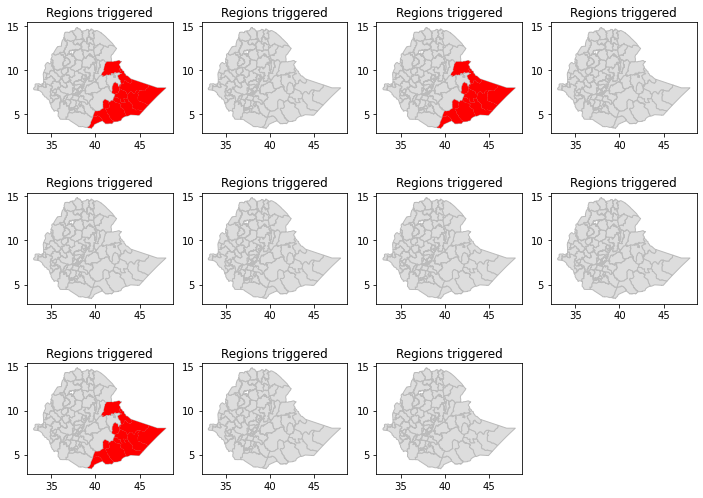

In [24]:
plot_regions_trig(df_snCS420)

In [25]:
import plotly.graph_objects as go

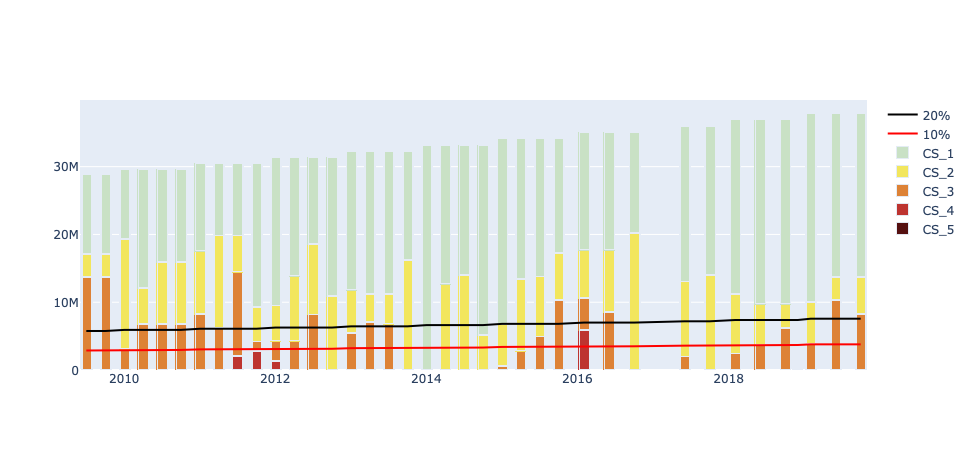

In [36]:
data=df_ipc[df_ipc.ADM1_EN=="Oromia"]
CS_list=[]
color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
for i in range(5,0,-1):
    CS_list.append(go.Bar(name=f'CS_{i}',x=data["date"],y=data[f"CS_{i}"],marker_color=color_map[i]))
CS_list.append(go.Scatter(x=data['date'], y=data['adjusted_population']/10,line=dict(
                color='Red'),name="10%"))
CS_list.append(go.Scatter(x=data['date'], y=data['adjusted_population']/5,line=dict(
                color='black'),name="20%"))
fig = go.Figure(data=CS_list)
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [88]:
def plot_ipclevels(df,adm1c="ADM1_EN"):
    color_map = {1:'#C9E1C5', 2:'#F2E65D', 3:'#DD8236', 4:'#BD3430', 5:'#551010', 99: '#CCCCCC'}
    width = 75
    count = 1
    fig, ax = plt.subplots(figsize=(15,30))
    plt.suptitle('Ethiopia Triggers at Admin1 Level')
    for region in df[adm1c].unique():
        ax = plt.subplot(6,2,count)
        data = df.loc[df[adm1c]==region]
#         total = data['CS_1']+data['CS_2']+data['CS_3']+data['CS_4'].to_numpy()
#         plt.bar(data["date"],data["CS_5"],width=width, color=color_map[5])
#         for i in range(4,0,-1):
#             plt.bar(data["date"],data[f"CS_{i}"],width=width, color=color_map[i],bottom=data[[f"CS_{l}" for l in range(i+1, 6)]].sum().to_numpy())
        p4 = plt.bar(data['date'], data['CS_4'], width=width, color=color_map[4],label="IPC 4")
        p3 = plt.bar(data['date'], data['CS_3'], width=width, color=color_map[3], bottom=data['CS_4'].to_numpy(),label="IPC 3")
        p2 = plt.bar(data['date'], data['CS_2'], width=width, color=color_map[2], bottom=(data['CS_3']+data['CS_4']).to_numpy(),label="IPC 2")
        p1 = plt.bar(data['date'], data['CS_1'], width=width, color=color_map[1], bottom=(data['CS_2']+data['CS_3']+data['CS_4']).to_numpy(),label="IPC 1")
        p5 = plt.plot(data['date'], data['adjusted_population']/10 , color='red',label="10%")
        p6 = plt.plot(data['date'], data['adjusted_population']/5, color='black',label="20%")
        plt.title(region + ' Current Situation')
#         ax.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), ('IPC 1', 'IPC 2', 'IPC 3', 'IPC 4', '10 %', '20 %'),loc="upper right")
        ax.legend(loc="upper right")
        ax.get_yaxis().set_major_formatter(
            matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        count+=1

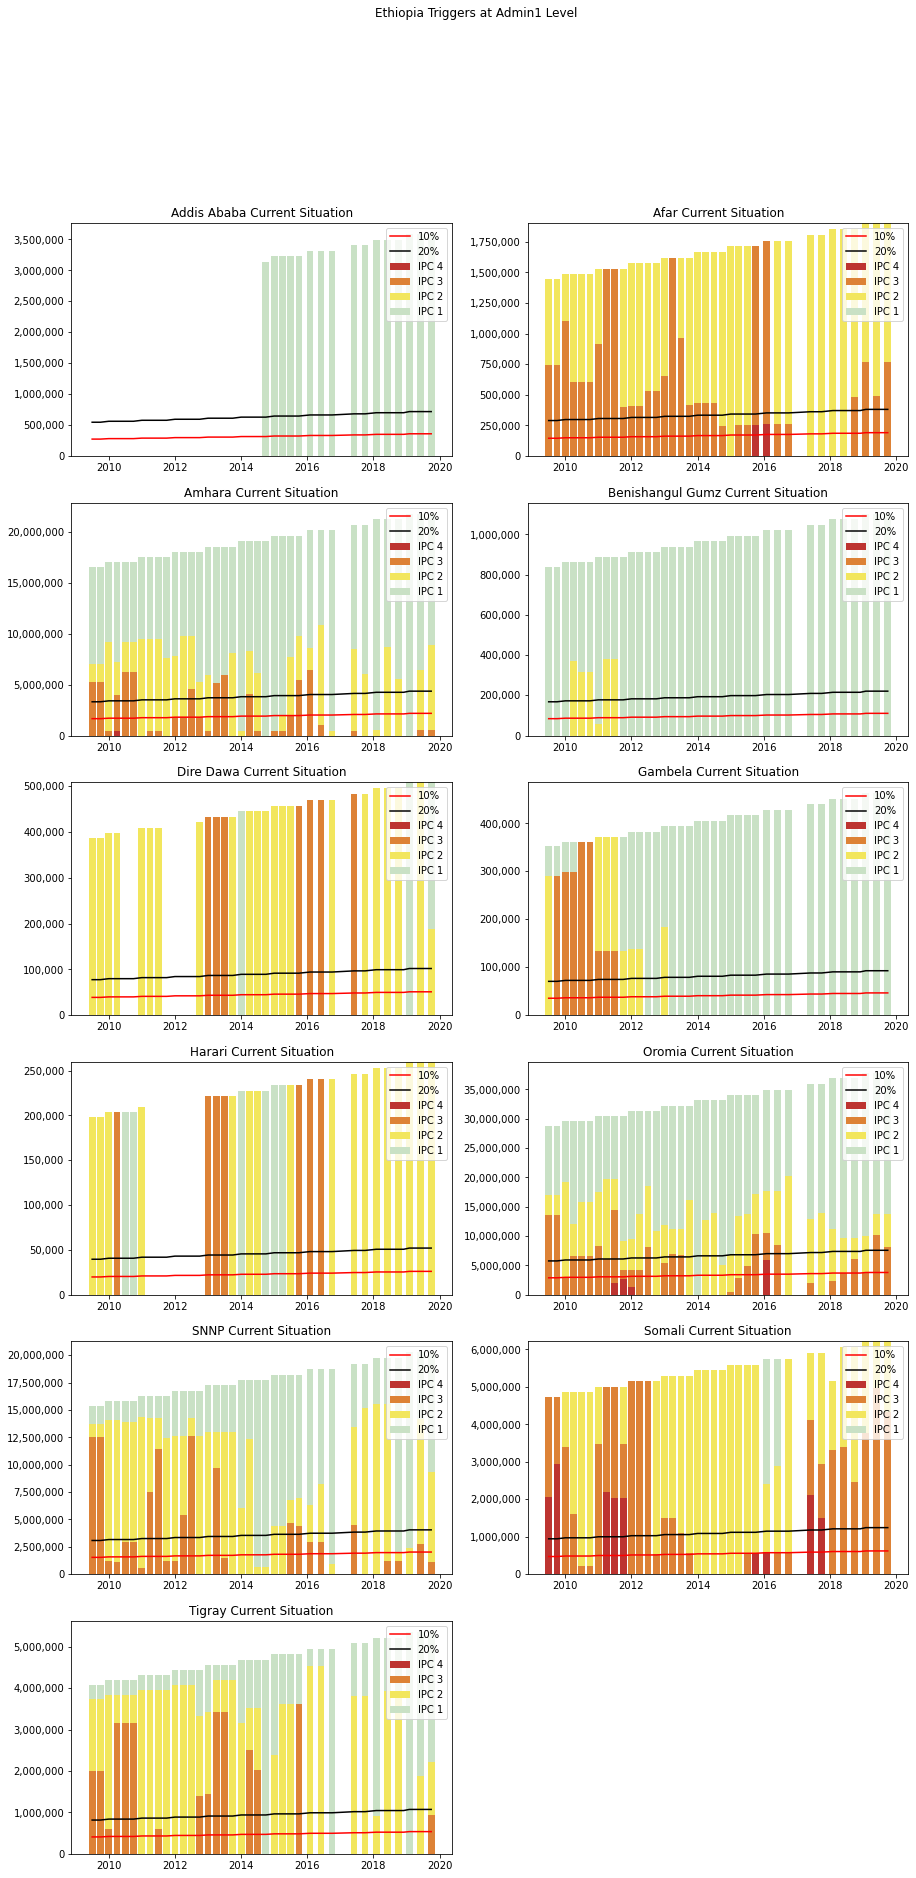

In [89]:
plot_ipclevels(df_ipc)

### Missing data

In [54]:
print("Number of date-admin1 combinations with no IPC CS data:", len(df_ipc[df_ipc.total_pop==0]))

Number of date-admin1 combinations with no IPC CS data: 45


In [57]:
print("Percentage of missing data:",len(df_ipc[df_ipc.total_pop==0])/len(df_ipc)*100)

Percentage of missing data: 10.76555023923445
